<a href="https://colab.research.google.com/github/ahxlzjt/MedImagingDL/blob/CH02_-Medical-Image-Processing-Tasks%2C-Applications%2C-and-Evaluation-metrics/radiology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import pydicom as dicom
from pathlib import Path
import os
print(os.getcwd())

/kaggle/working


In [ ]:
IMG_PATH= Path("/kaggle/input/siim-medical-images/")
print(IMG_PATH)

/kaggle/input/siim-medical-images


In [ ]:
data_df = pd.read_csv(IMG_PATH/"overview.csv")
data_df.head()

Unnamed: 0  Age  Contrast ContrastTag  \
0           0   60      True        NONE   
1           1   69      True        NONE   
2           2   74      True     APPLIED   
3           3   75      True        NONE   
4           4   56      True        NONE   

                                      raw_input_path  id  \
0   ../data/50_50_dicom_cases\Contrast\00001 (1).dcm   0   
1  ../data/50_50_dicom_cases\Contrast\00001 (10).dcm   1   
2  ../data/50_50_dicom_cases\Contrast\00001 (11).dcm   2   
3  ../data/50_50_dicom_cases\Contrast\00001 (12).dcm   3   
4  ../data/50_50_dicom_cases\Contrast\00001 (13).dcm   4   

                            tiff_name                          dicom_name  
0  ID_0000_AGE_0060_CONTRAST_1_CT.tif  ID_0000_AGE_0060_CONTRAST_1_CT.dcm  
1  ID_0001_AGE_0069_CONTRAST_1_CT.tif  ID_0001_AGE_0069_CONTRAST_1_CT.dcm  
2  ID_0002_AGE_0074_CONTRAST_1_CT.tif  ID_0002_AGE_0074_CONTRAST_1_CT.dcm  
3  ID_0003_AGE_0075_CONTRAST_1_CT.tif  ID_0003_AGE_0075_CONTRAST_1_CT.dcm  
4  ID_0004_AGE_0056_CONTRAST_1_CT.tif  ID_0004_AGE_0056_CONTRAST_1_CT.dcm

In [ ]:
data_df.keys()

Index(['Unnamed: 0', 'Age', 'Contrast', 'ContrastTag', 'raw_input_path', 'id',
       'tiff_name', 'dicom_name'],
      dtype='object')

In [ ]:
def process_data(path):
    dicom_path = IMG_PATH/path
    data = pd.DataFrame([{'path': filepath} for filepath in dicom_path.glob('*.dcm')])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

In [ ]:
print("Number of DICOM:", len(str(IMG_PATH/"dicom_dir")))
dicom_data = process_data('dicom_dir')
dicom_data.head()

Number of DICOM: 43


path  \
0  /kaggle/input/siim-medical-images/dicom_dir/ID...   
1  /kaggle/input/siim-medical-images/dicom_dir/ID...   
2  /kaggle/input/siim-medical-images/dicom_dir/ID...   
3  /kaggle/input/siim-medical-images/dicom_dir/ID...   
4  /kaggle/input/siim-medical-images/dicom_dir/ID...   

                                 file    ID  Age  Contrast Modality  
0  ID_0015_AGE_0061_CONTRAST_1_CT.dcm  0015   61      True       CT  
1  ID_0019_AGE_0070_CONTRAST_1_CT.dcm  0019   70      True       CT  
2  ID_0063_AGE_0073_CONTRAST_0_CT.dcm  0063   73     False       CT  
3  ID_0077_AGE_0074_CONTRAST_0_CT.dcm  0077   74     False       CT  
4  ID_0073_AGE_0074_CONTRAST_0_CT.dcm  0073   74     False       CT

In [ ]:
dicom_data.keys()

Index(['path', 'file', 'ID', 'Age', 'Contrast', 'Modality'], dtype='object')

In [ ]:
def show_images(data, dim=16, imtype='dicom'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        data_row_img = dicom.dcmread(data_row['path'])
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()

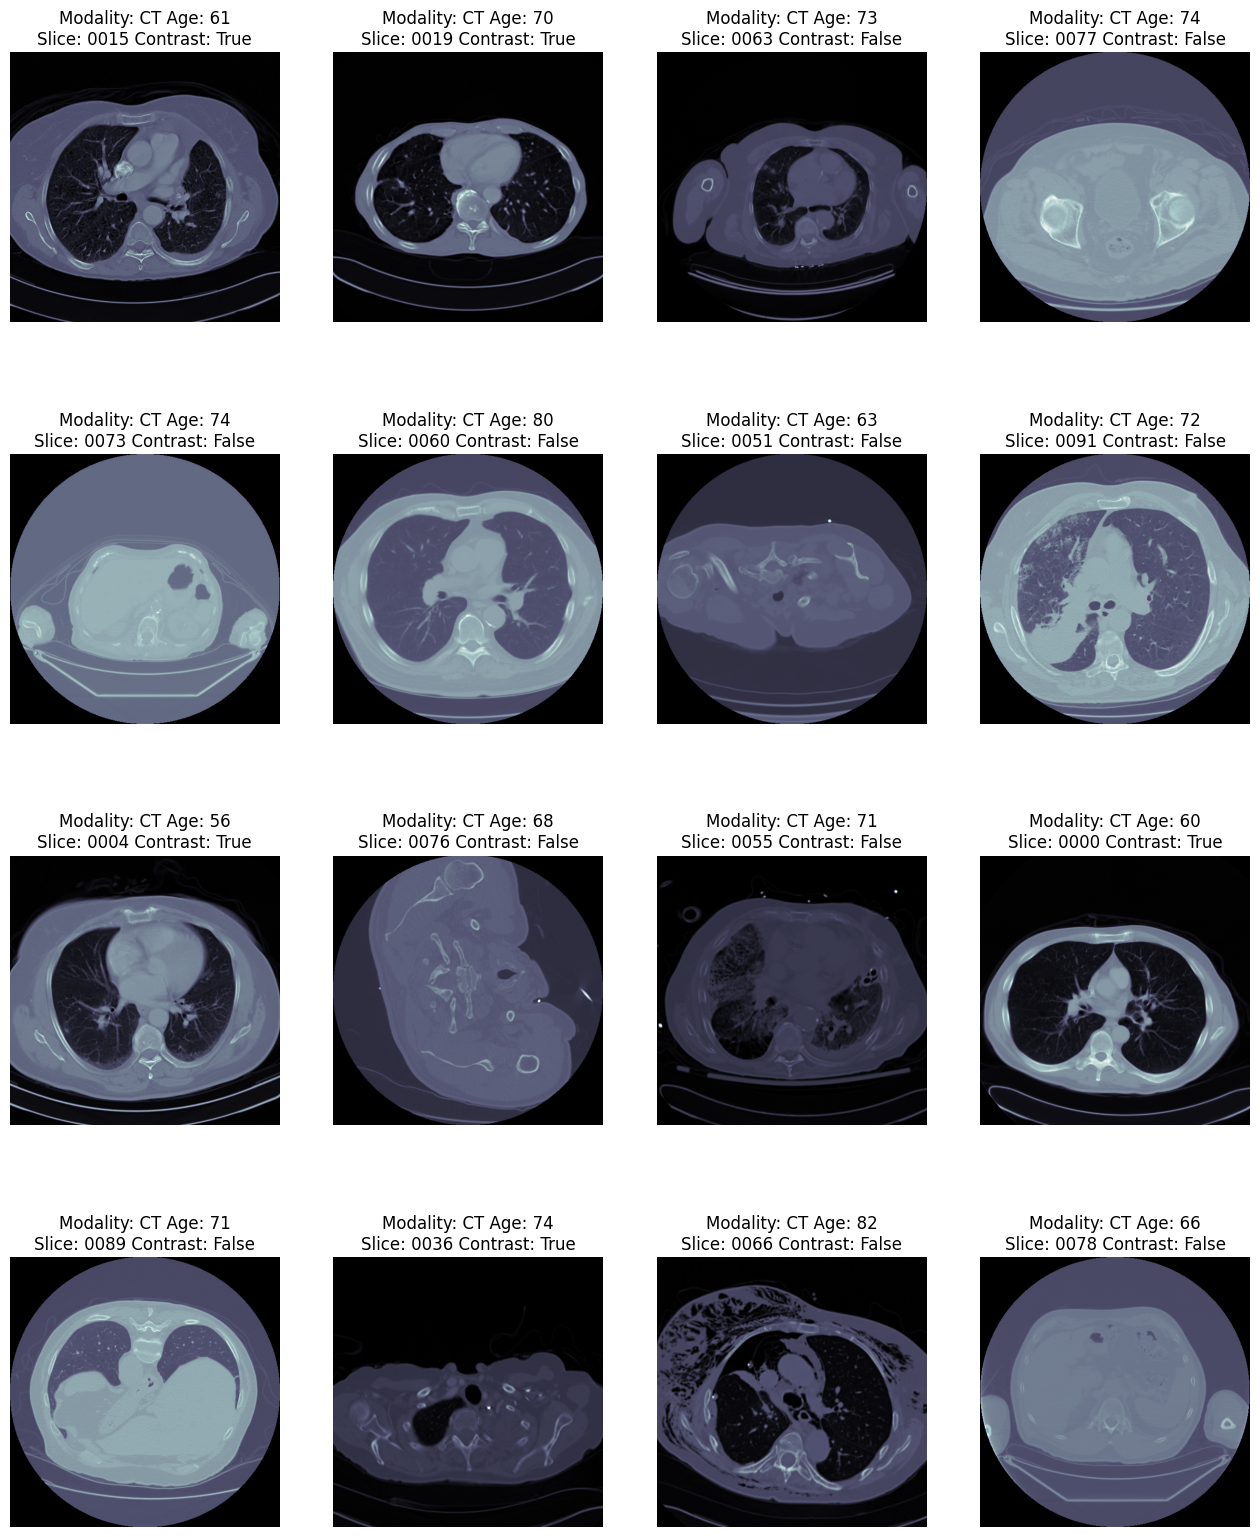

In [ ]:
show_images(dicom_data,16,'DICOM') # 이미지에 대한 slice들마다 quality나 밝기가 다름
# dicom 전처리 필요 -> window center, window width를 사용
# 사이즈는 동일해도 pixel간의 distance가 다름 -> 물리적으로 보는 영상은 다름.

In [ ]:
## preprocessing # meta data(raw한 이미지)가 들어가있음.
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[0])
dicom_dataset

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.612696157451530634003461974920
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 458
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.6

In [ ]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16),
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0

    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):

        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope

        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)

        image[slice_number] += np.int16(intercept)

    return np.array(image, dtype=np.int16)

def load_scan(path): # 모든 이미지에 대해 스캔함.(z space는 필요 x)
    slices = [dicom.dcmread(s) for s in path]
#     slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)

    for s in slices:
        s.SliceThickness = slice_thickness

    return slices

import scipy
def resample(image, scan, new_spacing=[1,1,1]): # HU 1x1x1로 interpolation(이미지 보간: 주어진 데이터 포인트들 사이의 값을 추정)함.
    # Determine current pixel spacing
    c_float = lambda x : [float(i) for i in x]
    spacing = np.array([float(1)] + c_float(scan.PixelSpacing), dtype=np.float32)
    resize_factor = spacing / new_spacing # 1x1에 얼마정도 비율의 차이가 나는지?
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    # factor를 새로운 이미지의 사이즈에 대해 설정, 새로운 사이즈 안에 interpolation
    # 해서 줌을 넣어 HU의 값이 resize된 factor 안에 들어가고, 그 값을 뽑아내는 과정.
    image = scipy.ndimage.zoom(image, real_resize_factor, mode='nearest')

    return image, new_spacing


In [ ]:
scan_dataset = load_scan(dicom_data['path'].to_list()) # 100개에 대한 데이터 읽기
hu_value = get_pixels_hu(scan_dataset)

In [ ]:
len(scan_dataset)

100

In [ ]:
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[0])
print(dicom_dataset[('0028', '0030')].value)

[006.562500e-01, 006.562500e-01]


In [ ]:
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[2])
print(dicom_dataset[('0028', '0030')].value)
# 각 픽셀 간의 spacing이 맞지 않음 (전처리할 때 스케일링을 동일하게 해줘야함.)

[0.9765625, 0.9765625]


In [ ]:
slice_n = 80
dicom_dataset = dicom.dcmread(dicom_data['path'].iloc[slice_n])
dicom_dataset[('0028', '0030')].value

[006.757812e-01, 006.757812e-01]

In [ ]:
from scipy.ndimage import zoom

In [ ]:
pix_resampled, spacing = resample(hu_value[[slice_n]], scan_dataset[slice_n], [1,1,1])
print("Shape before resampling\t", hu_value[[slice_n]].shape)
print("Shape after resampling\t", pix_resampled.shape)
# 이미지 사이즈가 줄어듬.

Shape before resampling	 (1, 512, 512)
Shape after resampling	 (1, 346, 346)


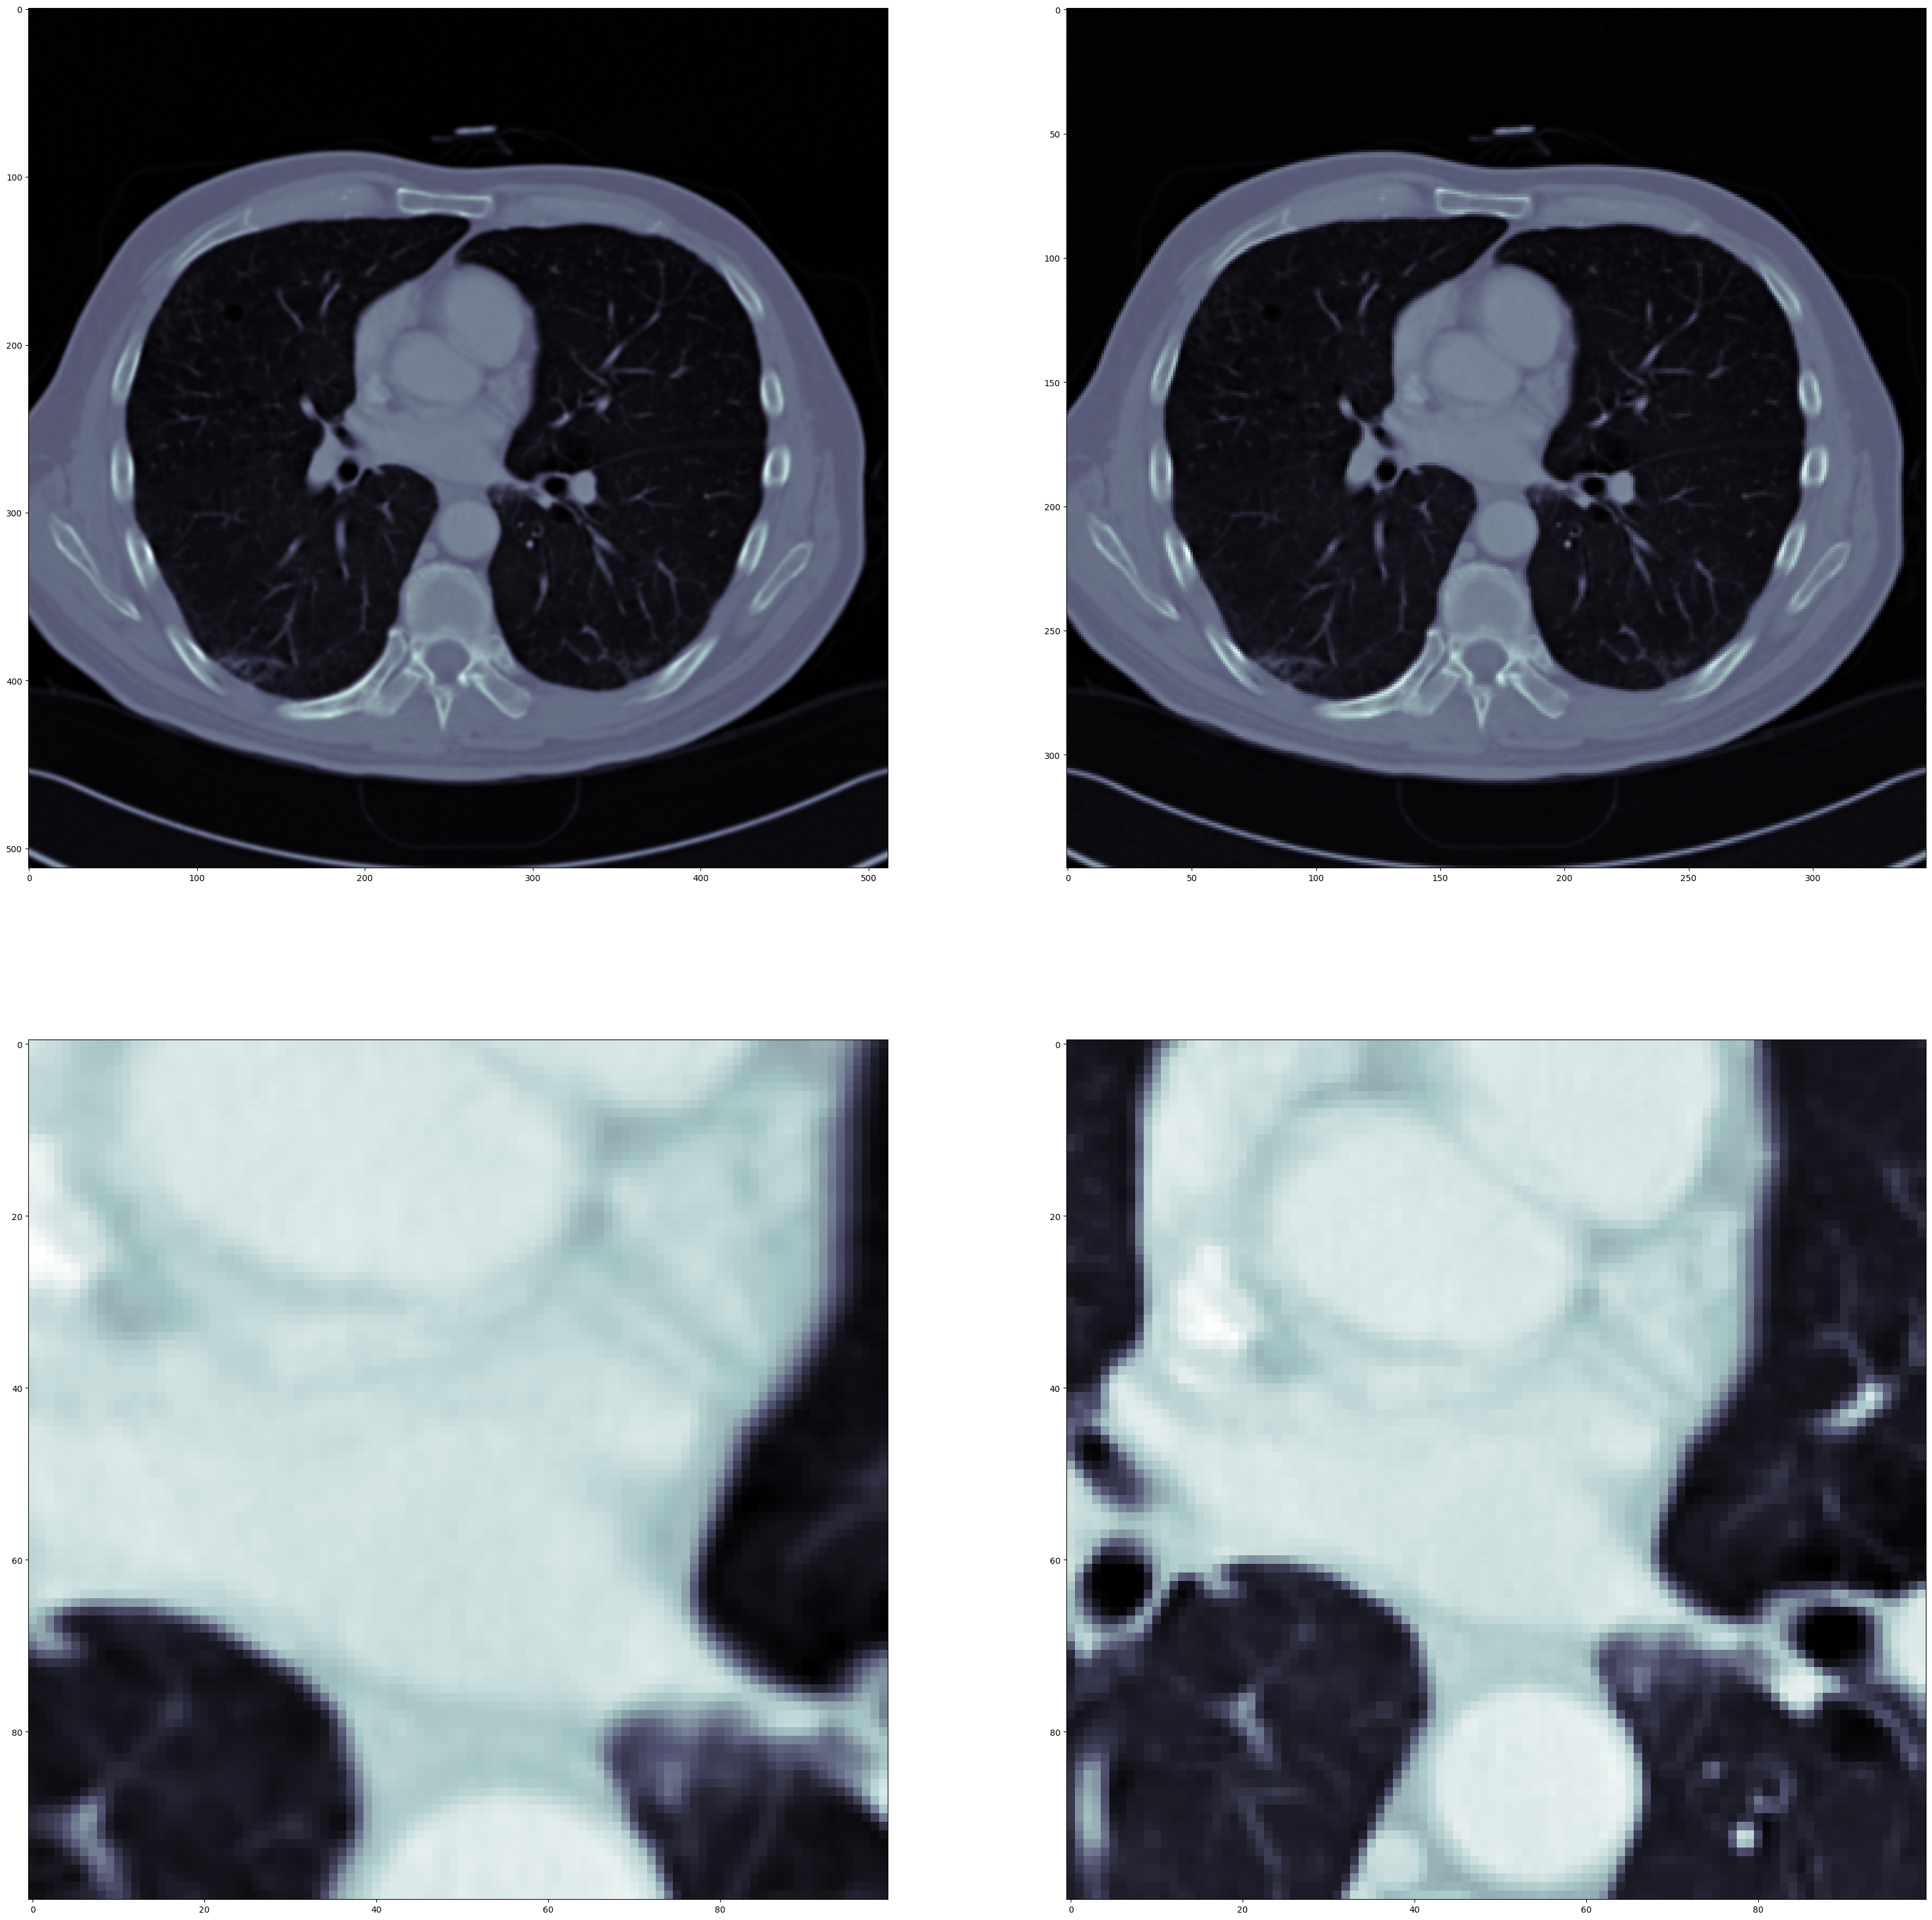

In [ ]:
# 왼쪽: pixel spacing X
# 오른쪽: pixel sapcing O : 이미지들은 더 작아지고, 해당하는 영역은 더 많은 것들이 함축됨.
#print(data)
fig,axs = plt.subplots(2,2,figsize=(40,40))

axs[0,0].imshow(hu_value[slice_n], cmap=plt.cm.bone)
axs[0,0].grid(False)

axs[0,1].imshow(pix_resampled[0], cmap=plt.cm.bone)
axs[0,1].grid(False)

w,h = hu_value[slice_n].shape
w/=2
h/=2
w,h = int(w),int(h)
axs[1,0].imshow(hu_value[slice_n][h-50:h+50,w-50:w+50], cmap=plt.cm.bone)
axs[1,0].grid(False)

w,h = pix_resampled[0].shape
w/=2
h/=2
w,h = int(w),int(h)
axs[1,1].imshow(pix_resampled[0,h-50:h+50,w-50:w+50], cmap=plt.cm.bone)
axs[1,1].grid(False)




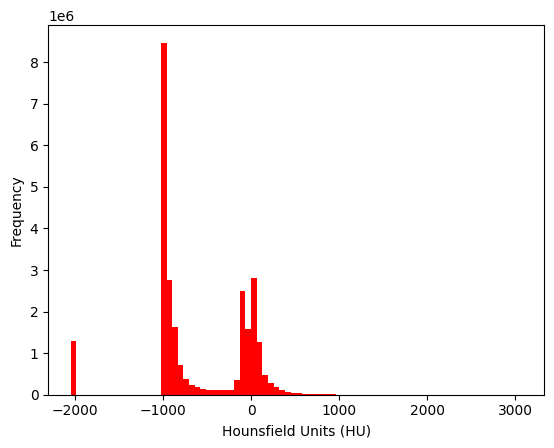

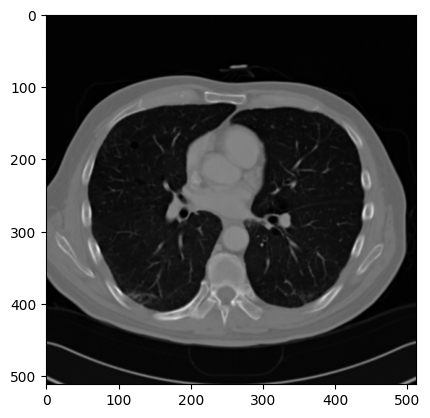

In [ ]:
# HU 값을 plotting
plt.hist(hu_value.flatten(), bins=80, color='r')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

plt.imshow(hu_value[80], cmap=plt.cm.gray)
plt.show()
# # Show some slice in the middle
# plt.imshow(first_patient_pixels[80], cmap=plt.cm.gray)
# plt.show()

In [ ]:
# window center, window width의 절반 이상과 미만의 min, max를 정해 값을 뽑아냄.
def window_image(img, window_center,window_width, intercept, slope):

    img = (img*slope +intercept)
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    return img

    # normalization

def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == dicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)

def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [ ]:
get_windowing(dicom_dataset)
# 30에서 좌우로 400, -1200씩 간 이미지
# 정말 optimal한 DICOM에 들어간 값이므로, 다시 바꿔서 window shift 통해 이미지 퀄리티를 올림.

[30, 400, -1024, 1]

In [ ]:
w_center, w_width, intercept, slope = get_windowing(dicom_dataset)

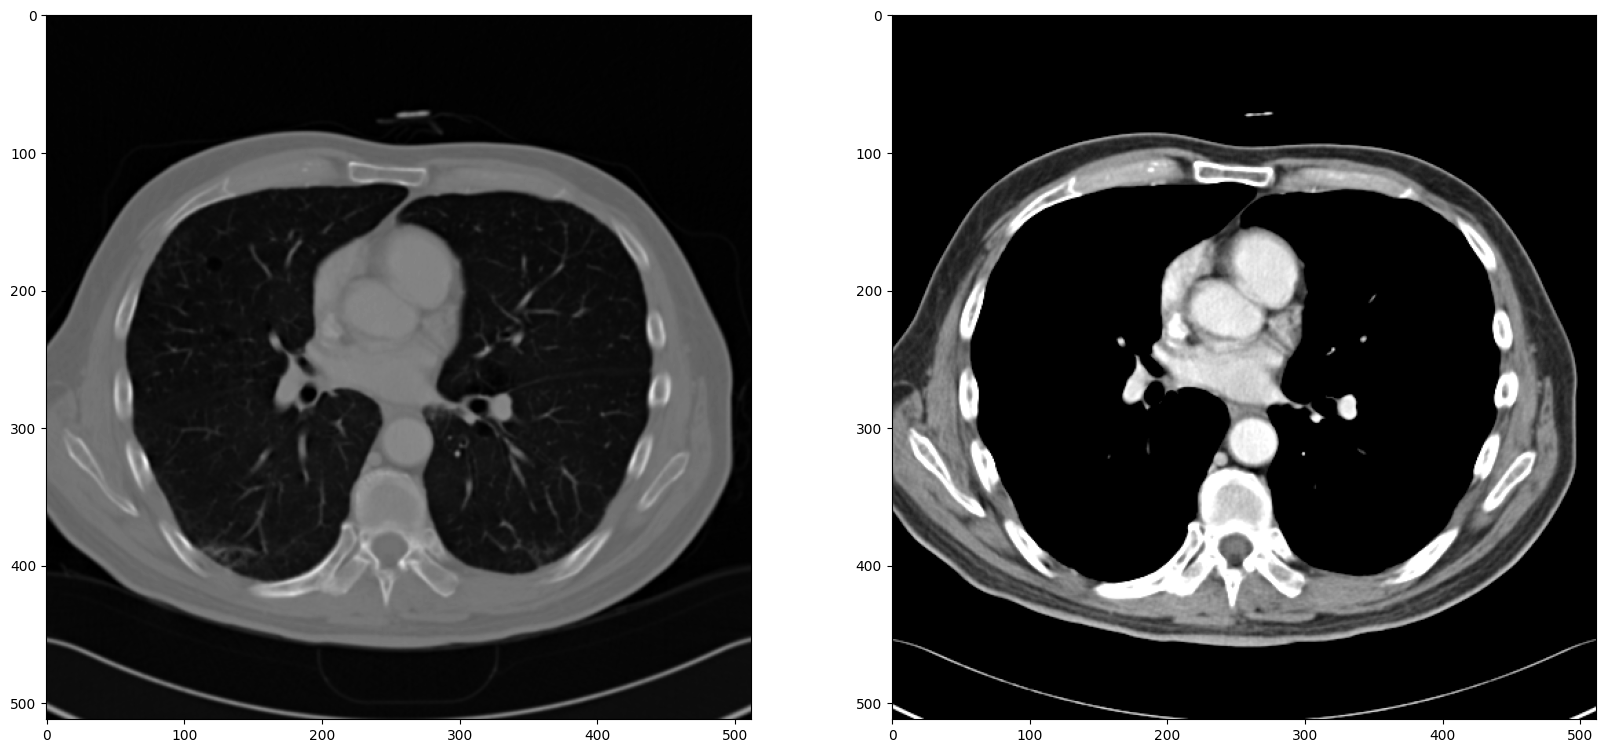

In [ ]:
import pydicom
import matplotlib.pyplot as plt
dicom_dataset = scan_dataset[80]
#print(data)
fig,axs = plt.subplots(1,2,figsize=(20,40))
window_center , window_width, intercept, slope = get_windowing(dicom_dataset)

# HU을 통해 window center, width를 나누어 normalize한 결괏값.
# 해당 영역에 대해 더 밝게 봄.
# cmap을 통해서 gray로 볼 수 있음.

#displaying the image
img = dicom_dataset.pixel_array
axs[0].imshow(img, cmap='gray')
axs[0].grid(False)
img = window_image(img, window_center, window_width, intercept, slope)
axs[1].imshow(img, cmap='gray')
axs[1].grid(False)

In [ ]:
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        data_row_img = dicom.dcmread(data_row['path'])
        window_center , window_width, intercept, slope = get_windowing(data_row_img)
        img = data_row_img.pixel_array
        img = window_image(img, window_center, window_width, intercept, slope)

        ax[i//4, i%4].imshow(img, cmap=plt.cm.bone)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()


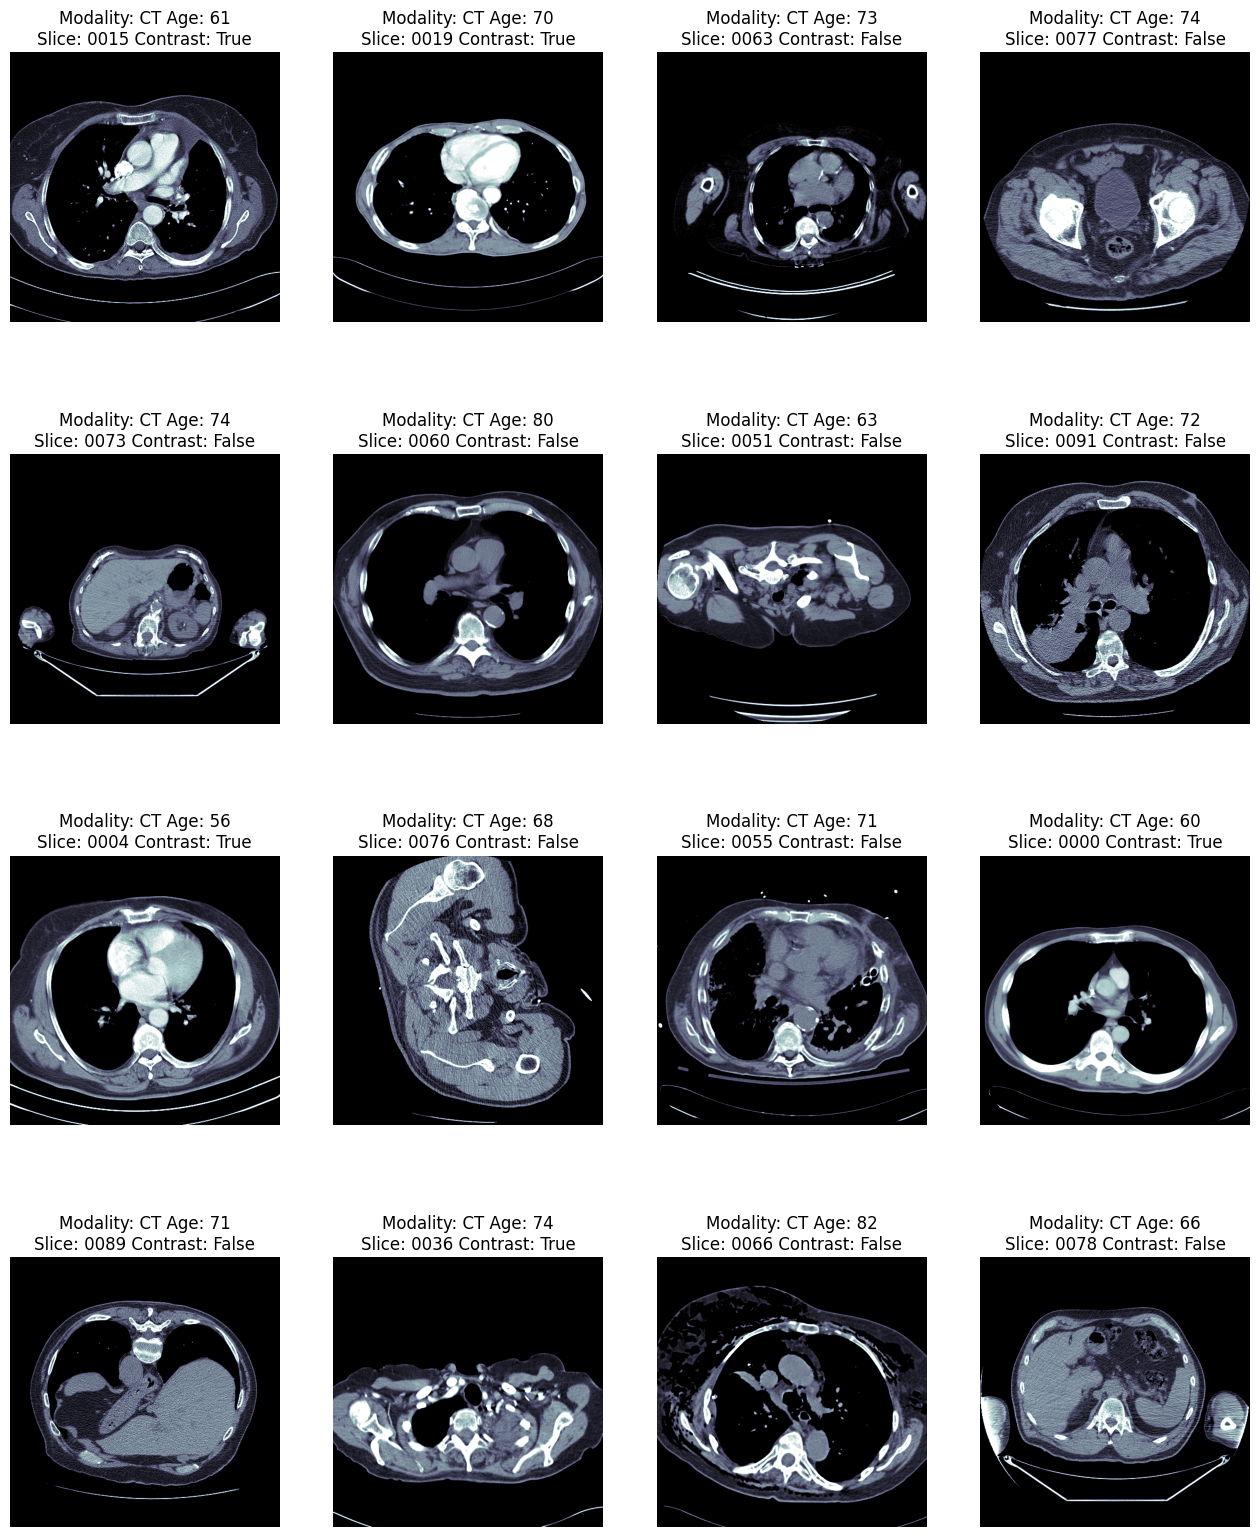

In [ ]:
show_images(dicom_data,16,'DICOM') # 균일하게 영상 나옴.

In [ ]:
window_center , window_width, intercept, slope

(30, 400, -1024, 1)

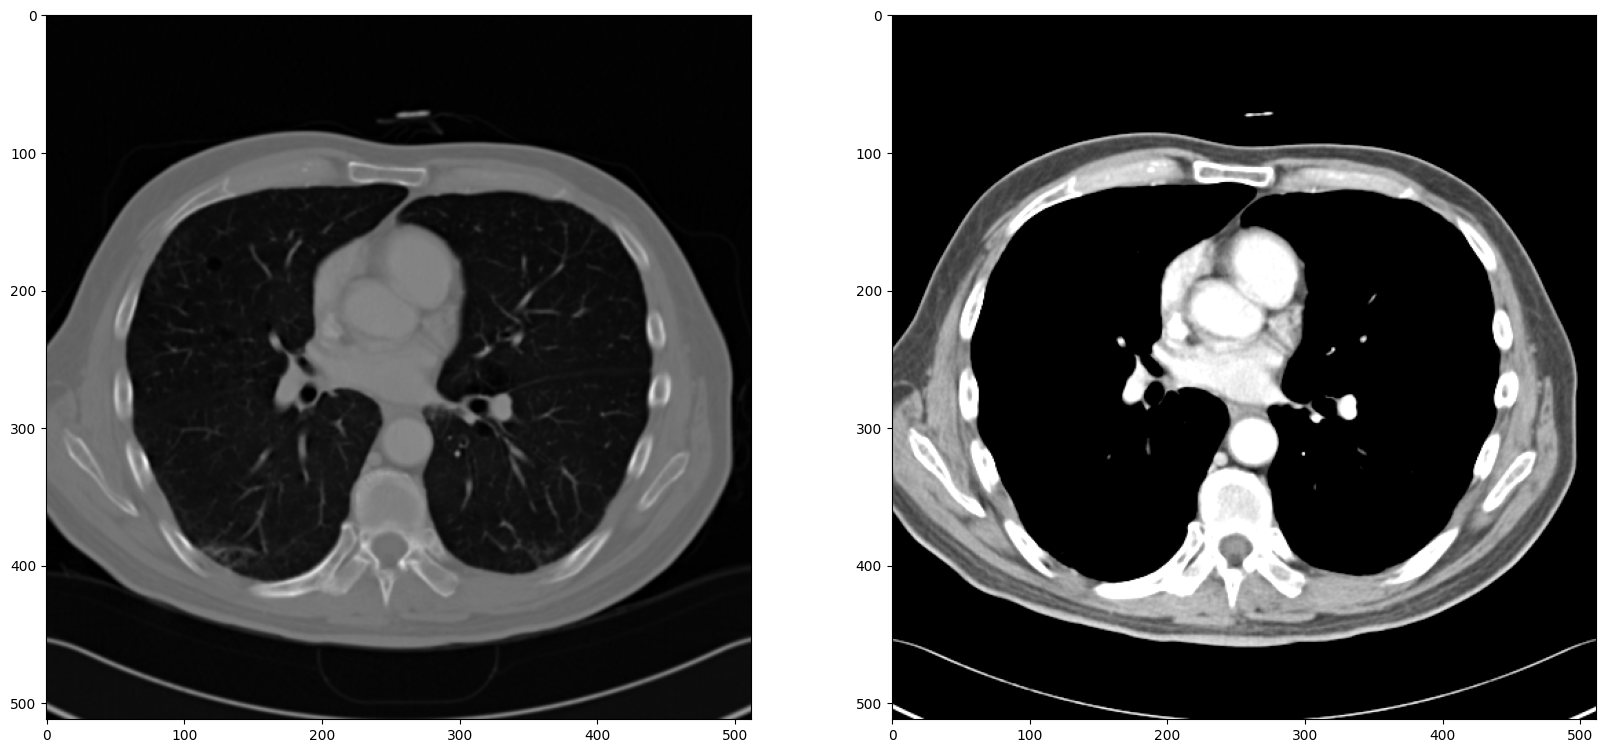

In [ ]:
# HU의 값을 설정 할 수 있음!
# window center, window width, intercept, slope이 중요한 역할.
# 처리와 DALCOM 안의 있는 값들을 사용하여 실제 이미지를 RESCALING하여 pixel spacing에 대해 값 맞춤.
# 적절한 타겟되는 이미지에 대해 HU 값을 맞춰 보여주는 것이 중요.

import pydicom
import matplotlib.pyplot as plt
dicom_dataset = scan_dataset[80]
#print(data)
fig,axs = plt.subplots(1,2,figsize=(20,40))
# window_center , window_width, intercept, slope = get_windowing(dicom_dataset)
window_center , window_width, intercept, slope = -20 , 400, -1024, 1 # RESIZE!

#displaying the image
img = dicom_dataset.pixel_array
axs[0].imshow(img, cmap='gray')
axs[0].grid(False)
img = window_image(img, window_center, window_width, intercept, slope)
axs[1].imshow(img, cmap='gray')
axs[1].grid(False)